# Lab 6

# Problem 1

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd
import random

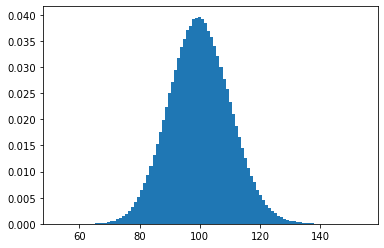

5 sigma value is 61.0.


In [3]:
bkgd = stats.poisson.rvs(100, loc = 0, size = 1000000)
fig, ax = plt.subplots(1, 1)

ax.hist(bkgd, density = True, bins = 100)
plt.show()

prob5sigma = stats.norm.cdf(5, loc = 0, scale = 1)
sig_val = stats.poisson.ppf(prob5sigma, 30, loc = 0)
print("5 sigma value is " + str(sig_val) + ".")

# Problem 2

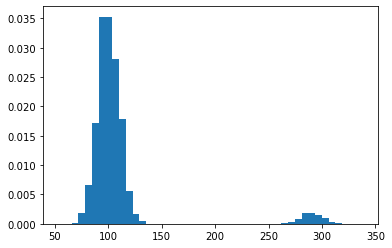

In [21]:
fig, ax = plt.subplots(1, 1)

prob8sigma = stats.norm.cdf(8, loc = 0, scale = 1)
sig8 = stats.poisson.ppf(prob8sigma, 100, loc = 0)

data = bkgd

inject = np.zeros(1000000)
for i in range(50000):
    inject[random.randint(0, 1000000)] = sig8

data = data + inject
    
ax.hist(data, bins = 45, density = True)
plt.show()

This looks like a Poisson at low values, but also has a (relatively) large probability for something way above the mean, so it isn't really Poisson. It also is not symmetric, which a large mean Poisson should be nearly symmetric. This is saying there is a large chance to observe a high brightness even if the mean is 100, but a very small chance to see anything between 150 and the lower end of the large lump, and almost no chance for anything below 60. This introduction of the same injection over and over biased the data towards higher values due to the asymmetry of it.

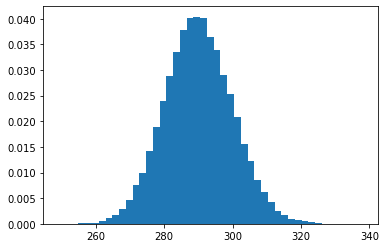

In [24]:
fig, ax = plt.subplots(1, 1)

data.sort()
index = 0
for i in range(len(data)):
    if data[i] >= 180:
        index = i
        break
    
cut_data = data[index:]
ax.hist(cut_data, bins = 45, density = True)
plt.show()

Above is the same histogram as before, but only the values above 180 (chosen arbitrarily as it is higher than the 5 sigma value, but lower than the injected 190 value). This looks more like a Poisson of high mean- relatively symmetric, unbiased, close to what the injection signal should look like.

# Problem 3

<ipython-input-6-b4632bb87182>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters, signalcenters, Psd.T, cmap = 'jet')


Text(0.5, 0, 'Observed data, $P(d|s)$')

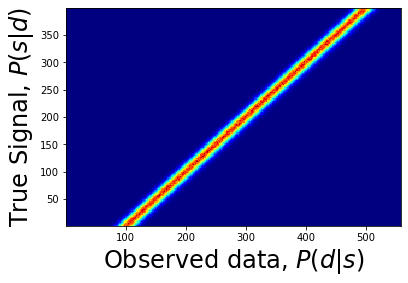

In [6]:
fig, ax = plt.subplots(1, 1)
strength = 400
signal = stats.uniform.rvs(loc = 0, scale = strength, size = 1000000)

data = bkgd + signal
signaledges = np.linspace(0, strength, int(strength / 2))
dataedges = np.linspace(0, strength + 160, int((strength + 160) / 2))

#Psd stores an array of data to signal
Psd, temp, temp2 = np.histogram2d(data,signal, bins = [dataedges, signaledges], density = True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T, cmap = 'jet')
plt.ylabel('True Signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

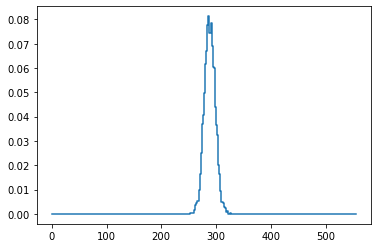

In [7]:
fig, ax = plt.subplots(1, 1)

lin = np.arange(0,strength + 160 - 2,2)
h_slice = Psd[:,int(190 / 2)]
h_slice = h_slice / np.sum(h_slice)
ax.step(lin, h_slice)

100

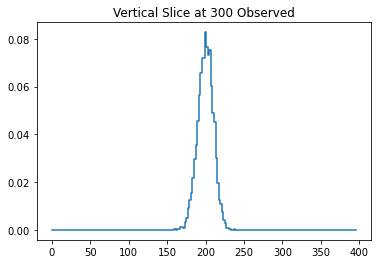

In [8]:
fig, ax = plt.subplots(1, 1)

obs = 300
v_slice = Psd[int(obs / 2)]
v_slice = v_slice / np.sum(v_slice)
lin = np.arange(0,strength - 2,2)
ax.step(lin, v_slice, where = 'mid')
ax.set_title("Vertical Slice at 300 Observed")

prob = 0
index = 0
for i in range(len(v_slice)):
    prob = prob + v_slice[i]
    if prob >= .5:
        index = i
        break

index